<a href="https://colab.research.google.com/github/smraytech/test/blob/main/k_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors
You should build a machine learning pipeline using a k-nearest neighbor model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a k-nearest neighbor model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/mnist.csv')
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.shape)

(4000, 786)


In [ ]:
print(df.columns)

Index(['id', 'class', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=786)


2. Data exploration

In [ ]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


In [ ]:
# Target distribution
print(df["class"].value_counts())

class
1    486
7    426
3    417
8    416
6    391
2    390
0    376
4    369
9    366
5    363
Name: count, dtype: int64


In [ ]:
# Pixel intensity range
print(df.drop(["id","class"], axis=1).describe())

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
count  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...     pixel775     pixel776     pixel777     pixel778  \
count   4000.0  ...  4000.000000  4000.000000  4000.000000  4000.000000   
mean       0.0  ...     0.076750     0.015250     0.013000     0.001500   
std        0.0  ...     2.616022     0.964495

3. Data preprocessing

*   KNN is distance-based, so feature scaling is critical.




In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop id column
X = df.drop(["id","class"], axis=1)
y = df["class"]

# Normalize features (pixel values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

5. Train KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Key hyperparameters:
# n_neighbors -> number of neighbors to look at
# weights -> 'uniform' (equal) or 'distance' (closer neighbors weigh more)
# metric -> distance measure ('minkowski', 'euclidean', 'manhattan')
knn = KNeighborsClassifier(
    n_neighbors=3,     # default = 5
    weights="distance", # closer neighbors count more
    metric="euclidean"  # standard L2 distance
)

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

6. Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.90625
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.95      0.99      0.97        97
           2       0.92      0.83      0.87        78
           3       0.91      0.95      0.93        84
           4       0.86      0.86      0.86        74
           5       0.91      0.92      0.91        73
           6       0.91      0.92      0.92        78
           7       0.88      0.91      0.89        85
           8       0.93      0.82      0.87        83
           9       0.84      0.85      0.84        73

    accuracy                           0.91       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.91      0.91      0.91       800



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix

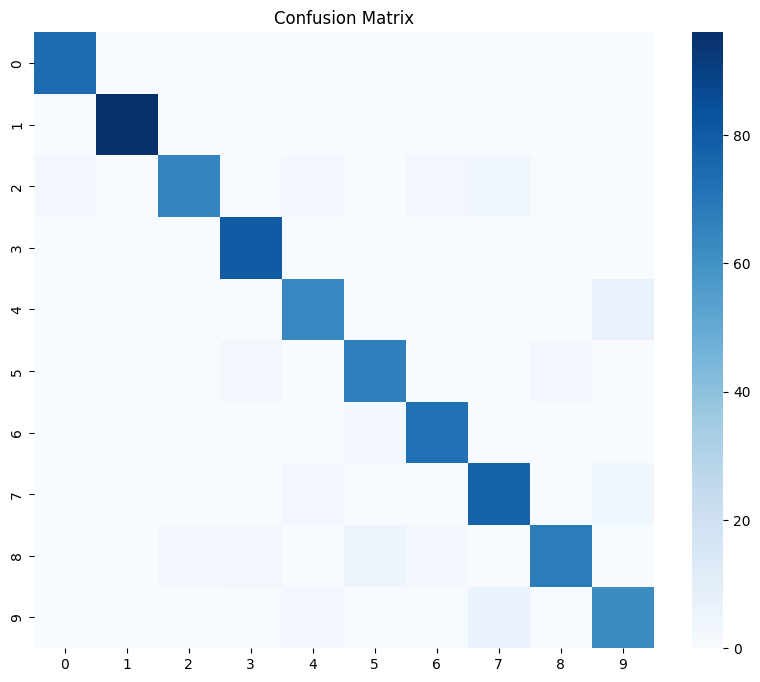

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

7. Inspect model attributes

In [ ]:
print("Number of neighbors used:", knn.n_neighbors)
print("Distance metric:", knn.effective_metric_)
print("Training samples stored:", len(knn._fit_X))

Number of neighbors used: 3
Distance metric: euclidean
Training samples stored: 3200


8. Test with a few samples

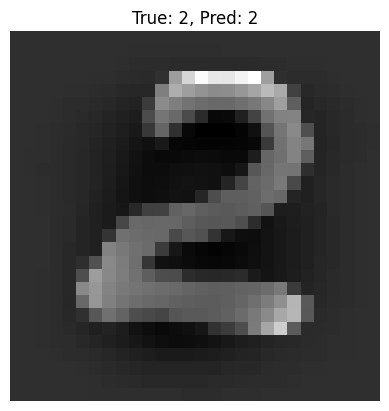

In [ ]:
# Pick one random test sample
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx].reshape(1, -1)
true_label = y_test.iloc[idx]
pred_label = knn.predict(sample)[0]

# Reshape to 28x28 image
plt.imshow(sample.reshape(28,28), cmap="gray")
plt.title(f"True: {true_label}, Pred: {pred_label}")
plt.axis("off")
plt.show()

Step 9: Hyperparameter Tuning with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid
param_grid = {
    "n_neighbors": [3, 5, 7],      # try different k values
    "weights": ["uniform", "distance"],  # voting strategy
    "metric": ["euclidean", "manhattan"] # distance functions
}

# Initialize KNN
knn = KNeighborsClassifier()

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=3,
    scoring="accuracy",
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.8937500769283521


Step 10: Evaluate best model

In [ ]:
# Get best model from grid search
best_knn = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_knn.predict(X_test)

# Accuracy & classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Test Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       0.93      1.00      0.97        97
           2       0.99      0.90      0.94        78
           3       0.88      0.93      0.90        84
           4       0.91      0.93      0.92        74
           5       0.86      0.88      0.87        73
           6       0.96      0.96      0.96        78
           7       0.89      0.91      0.90        85
           8       1.00      0.80      0.89        83
           9       0.86      0.89      0.87        73

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



# Confusion matrix

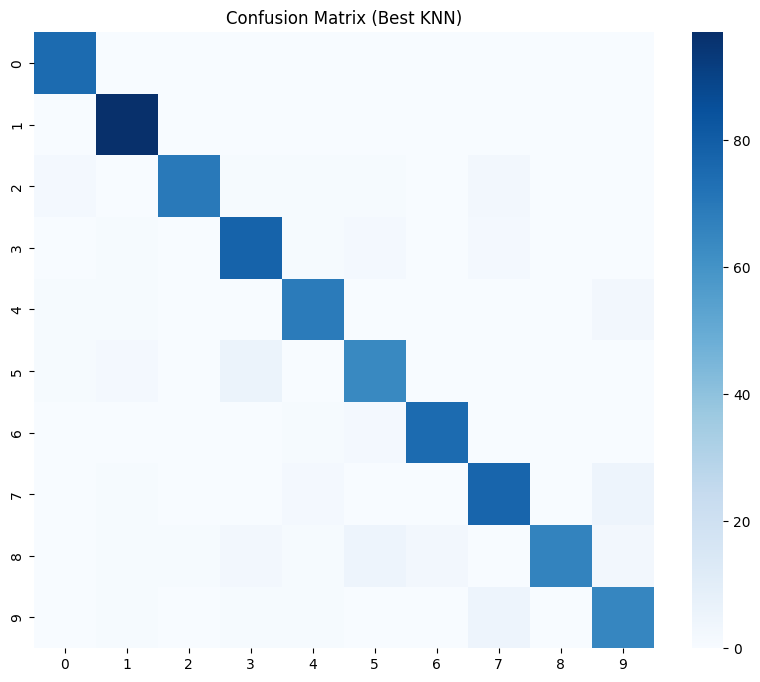

In [ ]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10,8))
sns.heatmap(cm_best, annot=False, cmap="Blues")
plt.title("Confusion Matrix (Best KNN)")
plt.show()

Step 11: Inspect best model attributes

In [ ]:
print("Best n_neighbors:", best_knn.n_neighbors)
print("Best weights:", best_knn.weights)
print("Best distance metric:", best_knn.effective_metric_)

Best n_neighbors: 3
Best weights: distance
Best distance metric: manhattan
